In [1]:
import numpy as np
import pandas as pd
import os

current_dir = os.getcwd()
data_path = current_dir+'\\PredictFutureSales\\'
sales_train = pd.read_csv(data_path + 'sales_train.csv')
shops = pd.read_csv(data_path + 'shops.csv')
items = pd.read_csv(data_path + 'items.csv')
item_categories = pd.read_csv(data_path + 'item_categories.csv')
test = pd.read_csv(data_path + 'test.csv')

In [2]:
sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [3]:
sales_train.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   date            2935849 non-null  object 
 1   date_block_num  2935849 non-null  int64  
 2   shop_id         2935849 non-null  int64  
 3   item_id         2935849 non-null  int64  
 4   item_price      2935849 non-null  float64
 5   item_cnt_day    2935849 non-null  float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


In [4]:
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [5]:
shops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   shop_name  60 non-null     object
 1   shop_id    60 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [6]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [7]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22170 entries, 0 to 22169
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   item_name         22170 non-null  object
 1   item_id           22170 non-null  int64 
 2   item_category_id  22170 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 519.7+ KB


In [8]:
item_categories.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [9]:
item_categories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   item_category_name  84 non-null     object
 1   item_category_id    84 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.4+ KB


In [10]:
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [11]:
train = sales_train.merge(shops, on='shop_id', how='left')
train = train.merge(items, on='item_id', how='left')
train = train.merge(item_categories, on='item_category_id', how='left')
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,item_name,item_category_id,item_category_name
0,02.01.2013,0,59,22154,999.00,1.0,"Ярославль ТЦ ""Альтаир""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
1,03.01.2013,0,25,2552,899.00,1.0,"Москва ТРК ""Атриум""",DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил
2,05.01.2013,0,25,2552,899.00,-1.0,"Москва ТРК ""Атриум""",DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил
3,06.01.2013,0,25,2554,1709.05,1.0,"Москва ТРК ""Атриум""",DEEP PURPLE Who Do You Think We Are LP,58,Музыка - Винил
4,15.01.2013,0,25,2555,1099.00,1.0,"Москва ТРК ""Атриум""",DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,Музыка - CD фирменного производства


In [12]:
#Feature summary table
def resumetable(df):
    print(f'format of data: {df.shape}')
    summary = pd.DataFrame(df.dtypes, columns=['Data Type'])
    summary = summary.reset_index()
    summary = summary.rename(columns={'index': 'feature'})
    summary['Num of Null'] = df.isnull().sum().values
    summary['Num of Unique'] = df.nunique().values
    summary['First value'] = df.loc[0].values
    summary['Second value'] = df.loc[1].values

    return summary
resumetable(train)

format of data: (2935849, 10)


,feature,Data Type,Num of Null,Num of Unique,First value,Second value
0,date,object,0,1034,02.01.2013,03.01.2013
1,date_block_num,int64,0,34,0,0
2,shop_id,int64,0,60,59,25
3,item_id,int64,0,21807,22154,2552
4,item_price,float64,0,19993,999.0,899.0
5,item_cnt_day,float64,0,198,1.0,1.0
6,shop_name,object,0,60,"Ярославль ТЦ ""Альтаир""","Москва ТРК ""Атриум"""
7,item_name,object,0,21807,ЯВЛЕНИЕ 2012 (BD),DEEP PURPLE The House Of Blue Light LP
8,item_category_id,int64,0,84,37,58
9,item_category_name,object,0,84,Кино - Blu-Ray,Музыка - Винил


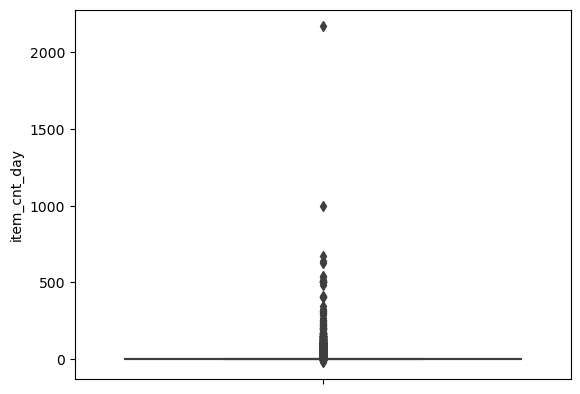

In [13]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
sns.boxplot(y='item_cnt_day', data=train);

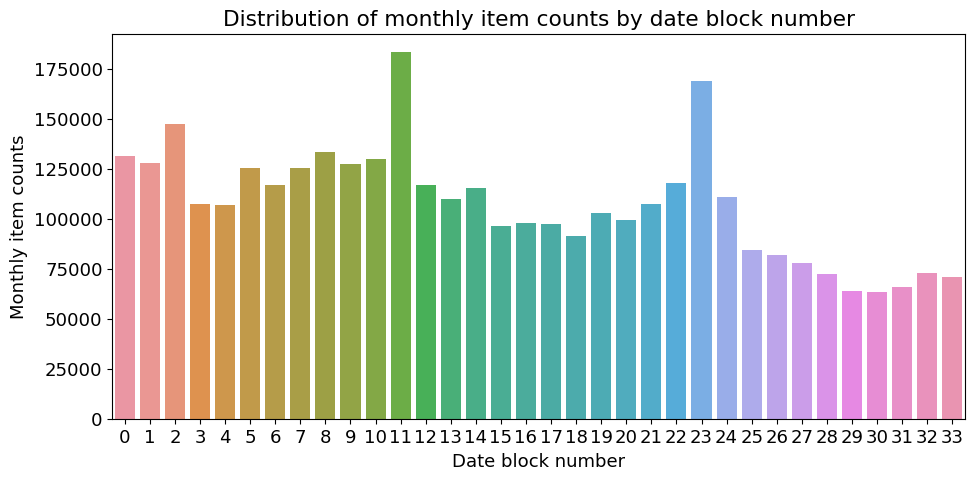

In [14]:
mpl.rc('font', size=13)
figure, ax = plt.subplots()
figure.set_size_inches(11, 5)

# total sales per Month
group_month_sum = train.groupby('date_block_num').agg({'item_cnt_day': 'sum'})
group_month_sum = group_month_sum.reset_index()
# Total sales bar graph
sns.barplot(x='date_block_num', y='item_cnt_day', data=group_month_sum)
ax.set(title='Distribution of monthly item counts by date block number',
 xlabel='Date block number',
 ylabel='Monthly item counts');

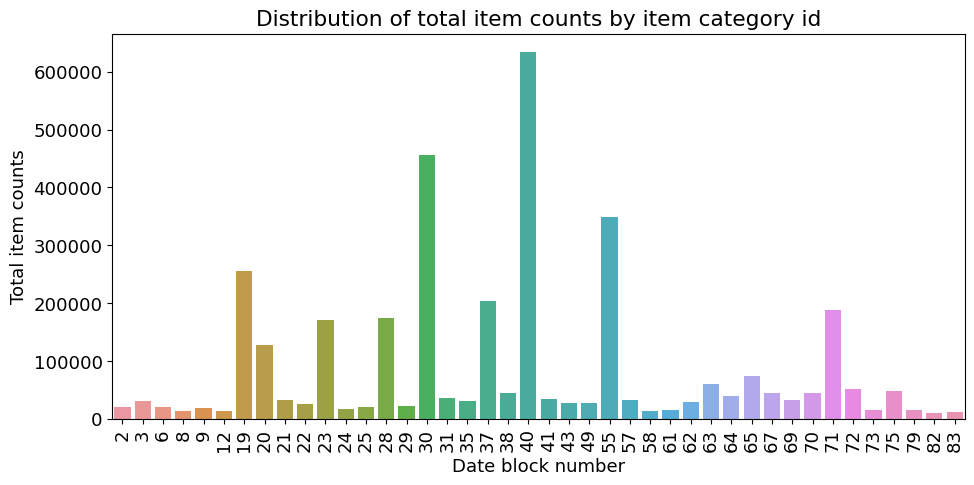

In [15]:
figure, ax= plt.subplots()
figure.set_size_inches(11, 5)

group_cat_sum = train.groupby('item_category_id').agg({'item_cnt_day': 'sum'})
group_cat_sum = group_cat_sum.reset_index()

group_cat_sum = group_cat_sum[group_cat_sum['item_cnt_day'] > 10000]
sns.barplot(x='item_category_id', y='item_cnt_day', data=group_cat_sum)
ax.set(title='Distribution of total item counts by item category id',
 xlabel='Date block number',
 ylabel='Total item counts')
ax.tick_params(axis='x', labelrotation=90)

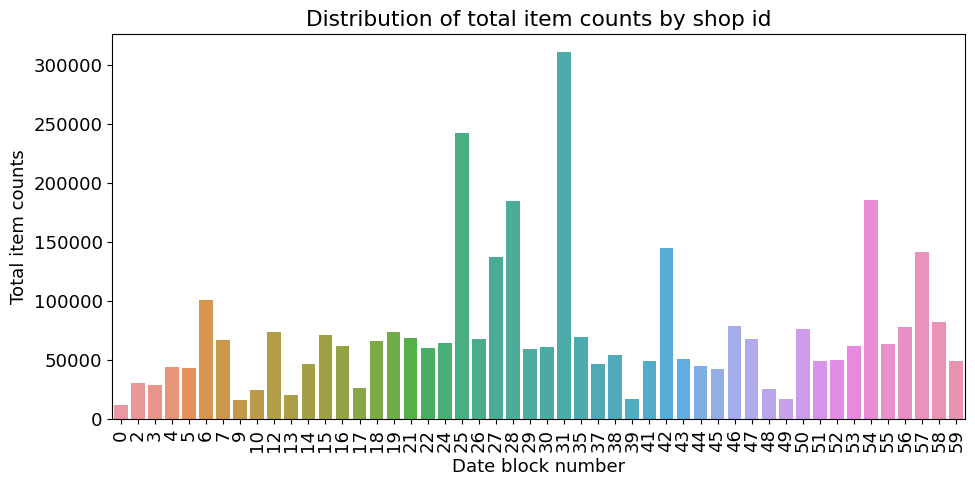

In [16]:
figure, ax= plt.subplots()
figure.set_size_inches(11, 5)

group_shop_sum = train.groupby('shop_id').agg({'item_cnt_day': 'sum'})
group_shop_sum = group_shop_sum.reset_index()
group_shop_sum = group_shop_sum[group_shop_sum['item_cnt_day'] > 10000]

sns.barplot(x='shop_id', y='item_cnt_day', data=group_shop_sum)
ax.set(title='Distribution of total item counts by shop id',
 xlabel='Date block number',
 ylabel='Total item counts')
ax.tick_params(axis='x', labelrotation=90)

In [17]:
current_dir = os.getcwd()
data_path = current_dir+'\\PredictFutureSales\\'
sales_train = pd.read_csv(data_path + 'sales_train.csv')
shops = pd.read_csv(data_path + 'shops.csv')
items = pd.read_csv(data_path + 'items.csv')
item_categories = pd.read_csv(data_path + 'item_categories.csv')
test = pd.read_csv(data_path + 'test.csv')

In [18]:
def downcast(df, verbose=True):
    start_mem = df.memory_usage().sum() / 1024**2
    for col in df.columns:
        dtype_name = df[col].dtype.name
        if dtype_name == 'object':
            pass
        elif dtype_name == 'bool':
            df[col] = df[col].astype('int8')
        elif dtype_name.startswith('int') or (df[col].round() == df[col]).all():
            df[col] = pd.to_numeric(df[col], downcast='integer')
        else:
            df[col] = pd.to_numeric(df[col], downcast='float')
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose:
        print('{:.1f}% zipped'.format(100 * (start_mem - end_mem) / start_mem))

    return df

In [19]:
all_df = [sales_train, shops, items, item_categories, test]
for df in all_df:
    df = downcast(df)

54.2% zipped
38.5% zipped
54.2% zipped
39.8% zipped
70.8% zipped


In [20]:
from itertools import product
train = []

for i in sales_train['date_block_num'].unique():
    all_shop = sales_train.loc[sales_train['date_block_num']==i, 'shop_id'].unique()
    all_item = sales_train.loc[sales_train['date_block_num']==i, 'item_id'].unique()
    train.append(np.array(list(product([i], all_shop, all_item))))
    idx_features = ['month_id', 'shop_id', 'item_id'] 
    
train = pd.DataFrame(np.vstack(train), columns=idx_features)

train

,month_id,shop_id,item_id
0,0,59,22154
1,0,59,2552
2,0,59,2554
3,0,59,2555
4,0,59,2564
...,...,...,...
10913845,33,21,7635
10913846,33,21,7638
10913847,33,21,7640
10913848,33,21,7632


In [21]:
sales_train =sales_train.rename(columns={'date_block_num': 'month_id'})

group = sales_train.groupby(idx_features).agg({'item_cnt_day': 'sum'})
# resetting index
group = group.reset_index()
# item_cnt_day  to monthly sales and date_block_num to month_id:
group = group.rename(columns={'item_cnt_day': 'monthly_sales'})


In [22]:
idx_features

['month_id', 'shop_id', 'item_id']

In [23]:
train

,month_id,shop_id,item_id
0,0,59,22154
1,0,59,2552
2,0,59,2554
3,0,59,2555
4,0,59,2564
...,...,...,...
10913845,33,21,7635
10913846,33,21,7638
10913847,33,21,7640
10913848,33,21,7632


In [24]:
train=train.merge(group, on=idx_features, how = 'left')

In [25]:
import gc # Garbage collection
del group 
gc.collect(); 

In [26]:
test['month_id'] =34
test['monthly_sales']=0
test=test.drop('ID', axis=1)
test

,shop_id,item_id,month_id,monthly_sales
0,5,5037,34,0
1,5,5320,34,0
2,5,5233,34,0
3,5,5232,34,0
4,5,5268,34,0
...,...,...,...,...
214195,45,18454,34,0
214196,45,16188,34,0
214197,45,15757,34,0
214198,45,19648,34,0


In [27]:
all_data = pd.concat([train, test], keys=idx_features)

C:\Users\bluea\AppData\Local\Temp\ipykernel_9620\1493826839.py:1: FutureWarning: The behavior of pd.concat with len(keys) != len(objs) is deprecated. In a future version this will raise instead of truncating to the smaller of the two sequences
  all_data = pd.concat([train, test], keys=idx_features)


In [28]:
all_data = all_data.fillna(0)
all_data

month_id  shop_id  item_id  monthly_sales
month_id 0              0       59    22154            1.0
         1              0       59     2552            0.0
         2              0       59     2554            0.0
         3              0       59     2555            0.0
         4              0       59     2564            0.0
...                   ...      ...      ...            ...
shop_id  214195        34       45    18454            0.0
         214196        34       45    16188            0.0
         214197        34       45    15757            0.0
         214198        34       45    19648            0.0
         214199        34       45      969            0.0

[11128050 rows x 4 columns]

In [29]:
all_data = all_data.merge(shops, on='shop_id', how='left')
all_data = all_data.merge(items, on='item_id', how='left')
all_data = all_data.merge(item_categories, on='item_category_id', how='left')

all_data = downcast(all_data)
all_data = all_data.drop(['item_category_name', 'shop_name', 'item_name'], axis=1)
del shops, items, item_categories
gc.collect();

31.1% zipped


In [30]:
all_data.head()

,month_id,shop_id,item_id,monthly_sales,item_category_id
0,0,59,22154,1,37
1,0,59,2552,0,58
2,0,59,2554,0,58
3,0,59,2555,0,56
4,0,59,2564,0,59


In [31]:

X_train = all_data[all_data['month_id'] < 33]
X_train = X_train.drop(['monthly_sales'], axis=1)

X_valid = all_data[all_data['month_id'] == 33]
X_valid = X_valid.drop(['monthly_sales'], axis=1)

X_test = all_data[all_data['month_id'] == 34]
X_test = X_test.drop(['monthly_sales'], axis=1)

y_train = all_data[all_data['month_id'] < 33]['monthly_sales']
y_train = y_train.clip(0, 20)
y_valid = all_data[all_data['month_id']==33]['monthly_sales']
y_valid = y_valid.clip(0, 20)

In [32]:
y_train.info(show_counts=True)

<class 'pandas.core.series.Series'>
Index: 10675678 entries, 0 to 10675677
Series name: monthly_sales
Non-Null Count     Dtype
--------------     -----
10675678 non-null  int16
dtypes: int16(1)
memory usage: 101.8 MB


In [33]:
del all_data
gc.collect();

In [34]:
#Base line model: LightGBM
import lightgbm as lgb
# HyperParameters for LightGBM
params = {'metric': 'rmse',
           'num_leaves': 255,
          'learning_rate': 0.01,
          'force_col_wise': True}

cat_features = ['shop_id', 'item_category_id']
dtrain = lgb.Dataset(X_train, y_train)
dvalid = lgb.Dataset(X_valid, y_valid)

lgb_model = lgb.train(params=params,
                      train_set=dtrain,
                      num_boost_round=500,
                      valid_sets=(dtrain, dvalid),
                      categorical_feature=cat_features,
                      callbacks=[lgb.log_evaluation(50)])

[LightGBM] [Info] Total Bins 428
[LightGBM] [Info] Number of data points in the train set: 10675678, number of used features: 4
[LightGBM] [Info] Start training from score 0.299125
[50]	training's rmse: 1.14752	valid_1's rmse: 1.06788
[100]	training's rmse: 1.11371	valid_1's rmse: 1.03967
[150]	training's rmse: 1.09614	valid_1's rmse: 1.02719
[200]	training's rmse: 1.08485	valid_1's rmse: 1.02008
[250]	training's rmse: 1.07654	valid_1's rmse: 1.01536
[300]	training's rmse: 1.06945	valid_1's rmse: 1.01215
[350]	training's rmse: 1.06345	valid_1's rmse: 1.00877
[400]	training's rmse: 1.05772	valid_1's rmse: 1.00684
[450]	training's rmse: 1.05192	valid_1's rmse: 1.00564
[500]	training's rmse: 1.04734	valid_1's rmse: 1.00412


In [35]:
preds = lgb_model.predict(X_test).clip(0, 20)

In [36]:
#Improving the model
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings(action='ignore') 

current_dir = os.getcwd()
data_path = current_dir+'\\PredictFutureSales\\'
sales_train = pd.read_csv(data_path + 'sales_train.csv')
shops = pd.read_csv(data_path + 'shops.csv')
items = pd.read_csv(data_path + 'items.csv')
item_categories = pd.read_csv(data_path + 'item_categories.csv')
test = pd.read_csv(data_path + 'test.csv')

In [37]:
def downcast(df, verbose=True):
    start_mem = df.memory_usage().sum() / 1024**2
    for col in df.columns:
        dtype_name = df[col].dtype.name
        if dtype_name == 'object':
            pass
        elif dtype_name == 'bool':
            df[col] = df[col].astype('int8')
        elif dtype_name.startswith('int') or (df[col].round() == df[col]).all():
            df[col] = pd.to_numeric(df[col], downcast='integer')
        else:
            df[col] = pd.to_numeric(df[col], downcast='float')
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose:
        print('{:.1f}% zipped'.format(100 * (start_mem - end_mem) / start_mem))

    return df

all_df = [sales_train, shops, items, item_categories, test]
for df in all_df:
    df = downcast(df)

54.2% zipped
38.5% zipped
54.2% zipped
39.8% zipped
70.8% zipped


In [38]:
#Removing outliers
sales_train = sales_train[sales_train['item_price'] > 0]
sales_train = sales_train[sales_train['item_price'] < 50000]
sales_train = sales_train[sales_train['item_cnt_day'] > 0]
sales_train = sales_train[sales_train['item_cnt_day'] < 1000]

In [39]:
print(shops['shop_name'][0], '||', shops['shop_name'][57])
print(shops['shop_name'][1], '||', shops['shop_name'][58])
print(shops['shop_name'][10], '||', shops['shop_name'][11])
print(shops['shop_name'][39], '||', shops['shop_name'][40])

!Якутск Орджоникидзе, 56 фран || Якутск Орджоникидзе, 56
!Якутск ТЦ "Центральный" фран || Якутск ТЦ "Центральный"
Жуковский ул. Чкалова 39м? || Жуковский ул. Чкалова 39м²
РостовНаДону ТРК "Мегацентр Горизонт" || РостовНаДону ТРК "Мегацентр Горизонт" Островной


In [40]:
sales_train.loc[sales_train['shop_id'] == 0, 'shop_id'] = 57
sales_train.loc[sales_train['shop_id'] == 1, 'shop_id'] = 58
sales_train.loc[sales_train['shop_id'] == 10, 'shop_id'] = 11
sales_train.loc[sales_train['shop_id'] == 39, 'shop_id'] = 40

test.loc[test['shop_id'] == 0, 'shop_id'] = 57
test.loc[test['shop_id'] == 1, 'shop_id'] = 58
test.loc[test['shop_id'] == 10, 'shop_id'] = 11
test.loc[test['shop_id'] == 39, 'shop_id'] = 40

In [41]:
shops['city'] = shops['shop_name'].apply(lambda x: x.split()[0])
shops['city'].unique()

array(['!Якутск', 'Адыгея', 'Балашиха', 'Волжский', 'Вологда', 'Воронеж',
       'Выездная', 'Жуковский', 'Интернет-магазин', 'Казань', 'Калуга',
       'Коломна', 'Красноярск', 'Курск', 'Москва', 'Мытищи', 'Н.Новгород',
       'Новосибирск', 'Омск', 'РостовНаДону', 'СПб', 'Самара', 'Сергиев',
       'Сургут', 'Томск', 'Тюмень', 'Уфа', 'Химки', 'Цифровой', 'Чехов',
       'Якутск', 'Ярославль'], dtype=object)

In [42]:
shops.loc[shops['city'] =='!Якутск', 'city'] = 'Якутск'

In [43]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
shops['city'] = label_encoder.fit_transform(shops['city'])

In [44]:
shops = shops.drop('shop_name', axis=1)
shops.head()

,shop_id,city
0,0,29
1,1,29
2,2,0
3,3,1
4,4,2


In [45]:
items = items.drop(['item_name'], axis=1)

In [46]:
items['first_sale'] = sales_train.groupby('item_id').agg({'date_block_num': 'min'})['date_block_num']
items.head()

,item_id,item_category_id,first_sale
0,0,40,20.0
1,1,76,15.0
2,2,40,19.0
3,3,40,18.0
4,4,40,20.0


In [47]:
items[items['first_sale'].isna()]


,item_id,item_category_id,first_sale
83,83,40,NaN
140,140,45,NaN
168,168,44,NaN
173,173,45,NaN
204,204,44,NaN
...,...,...,...
21974,21974,61,NaN
21975,21975,61,NaN
22022,22022,40,NaN
22035,22035,40,NaN


In [48]:
items['first_sale'] = items['first_sale'].fillna(34)

In [49]:
item_categories['BigCategory'] = item_categories['item_category_name'].apply(lambda x:
 x.split()[0])

In [50]:
item_categories.head()

,item_category_name,item_category_id,BigCategory
0,PC - Гарнитуры/Наушники,0,PC
1,Аксессуары - PS2,1,Аксессуары
2,Аксессуары - PS3,2,Аксессуары
3,Аксессуары - PS4,3,Аксессуары
4,Аксессуары - PSP,4,Аксессуары


In [51]:
def make_etc(x):
    if len(item_categories[item_categories['BigCategory']==x]) >= 5:
        return x
    else:
        return 'etc'
# change the name of big category if the number of unique values are less than 5
item_categories['BigCategory'] = item_categories['BigCategory'].apply(make_etc)

In [52]:
label_encoder = LabelEncoder()
item_categories['BigCategory'] = label_encoder.fit_transform(item_categories['BigCategory'])

In [53]:
item_categories = item_categories.drop('item_category_name', axis=1)

In [54]:
sales_train

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1
1,03.01.2013,0,25,2552,899.00,1
3,06.01.2013,0,25,2554,1709.05,1
4,15.01.2013,0,25,2555,1099.00,1
5,10.01.2013,0,25,2564,349.00,1
...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1
2935845,09.10.2015,33,25,7460,299.00,1
2935846,14.10.2015,33,25,7459,349.00,1
2935847,22.10.2015,33,25,7440,299.00,1


In [55]:
from itertools import product
train = []

for i in sales_train['date_block_num'].unique():
    all_shop = sales_train.loc[sales_train['date_block_num']==i, 'shop_id'].unique()
    all_item = sales_train.loc[sales_train['date_block_num']==i, 'item_id'].unique()
    train.append(np.array(list(product([i], all_shop, all_item))))
    idx_features = ['month_id', 'shop_id', 'item_id'] 
    
train = pd.DataFrame(np.vstack(train), columns=idx_features)

train

,month_id,shop_id,item_id
0,0,59,22154
1,0,59,2552
2,0,59,2554
3,0,59,2555
4,0,59,2564
...,...,...,...
10812763,33,21,7635
10812764,33,21,7638
10812765,33,21,7640
10812766,33,21,7632


In [56]:
sales_train =sales_train.rename(columns={'date_block_num': 'month_id'})

group = sales_train.groupby(idx_features).agg({'item_cnt_day': 'sum', 
                                               'item_price': 'mean'})
# resetting index
group = group.reset_index()
# item_cnt_day  to monthly sales and date_block_num to month_id:
group = group.rename(columns={'item_cnt_day': 'monthly_sales', 
                             'item_price': 'mean_price'})
train = train.merge(group, on=idx_features, how='left')
train.head()

,month_id,shop_id,item_id,monthly_sales,mean_price
0,0,59,22154,1.0,999.0
1,0,59,2552,NaN,NaN
2,0,59,2554,NaN,NaN
3,0,59,2555,NaN,NaN
4,0,59,2564,NaN,NaN


In [57]:
del group
gc.collect()

2

In [58]:
group = sales_train.groupby(idx_features).agg({'item_cnt_day': 'count'})
group = group.reset_index()
group = group.rename(columns={'item_cnt_day': 'sale_day_count'})
train = train.merge(group, on=idx_features, how='left')

del group, sales_train
gc.collect()
train.head()

,month_id,shop_id,item_id,monthly_sales,mean_price,sale_day_count
0,0,59,22154,1.0,999.0,1.0
1,0,59,2552,NaN,NaN,NaN
2,0,59,2554,NaN,NaN,NaN
3,0,59,2555,NaN,NaN,NaN
4,0,59,2564,NaN,NaN,NaN


In [59]:
test['month_id'] =34
test=test.drop('ID', axis=1)
all_data = pd.concat([train, test], ignore_index=True, keys=idx_features)
all_data= all_data.fillna(0)
all_data.head()

,month_id,shop_id,item_id,monthly_sales,mean_price,sale_day_count
0,0,59,22154,1.0,999.0,1.0
1,0,59,2552,0.0,0.0,0.0
2,0,59,2554,0.0,0.0,0.0
3,0,59,2555,0.0,0.0,0.0
4,0,59,2564,0.0,0.0,0.0


In [60]:
all_data = all_data.merge(shops, on='shop_id', how='left')
all_data = all_data.merge(items, on='item_id', how='left')
all_data = all_data.merge(item_categories, on='item_category_id', how='left')
all_data = downcast(all_data)

64.2% zipped


In [61]:
del shops, items, item_categories
gc.collect();

In [62]:
def add_mean_features(df, mean_features, idx_features):
    assert (idx_features[0] == 'month_id') and  len(idx_features) in [2, 3]

    if len(idx_features) == 2:
        feature_name = 'montly_sales_'+idx_features[1] 
    else:
        feature_name = 'montly_sales_'+ idx_features[1] + '_' + idx_features[2] 

    group = df.groupby(idx_features).agg({'monthly_sales': 'mean'})
    group = group.reset_index()
    group = group.rename(columns={'monthly_sales': feature_name})
    
    df = df.merge(group, on=idx_features, how='left')
    df = downcast(df, verbose=False)
    mean_features.append(feature_name)

    del group
    gc.collect()
    
    return df, mean_features #

In [63]:
item_mean_features = []

all_data, item_mean_features = add_mean_features(df=all_data,
                                                 mean_features=item_mean_features,
                                                 idx_features=['month_id', 'item_id'])
all_data, item_mean_features = add_mean_features(df=all_data,
                                                 mean_features=item_mean_features,idx_features=['month_id', 'item_id', 'city'])

In [64]:
item_mean_features

['montly_sales_item_id', 'montly_sales_item_id_city']

In [65]:
shop_mean_features = []
all_data, shop_mean_features = add_mean_features(df=all_data,
 mean_features=shop_mean_features,
 idx_features=['month_id', 'shop_id', 'item_category_id'])
shop_mean_features

['montly_sales_shop_id_item_category_id']

In [66]:
def add_lag_features(df, lag_features_to_clip, idx_features,
                     lag_feature, nlags=3, clip=False):

    df_temp = df[idx_features + [lag_feature]].copy()
    for i in range(1, nlags+1):
        lag_feature_name = lag_feature +'_lag' + str(i)
        df_temp.columns = idx_features + [lag_feature_name]
        df_temp['month_id'] += 1
        df = df.merge(df_temp.drop_duplicates(),
                      on=idx_features,
                      how='left')
        df[lag_feature_name] = df[lag_feature_name].fillna(0)
        if clip:
            lag_features_to_clip.append(lag_feature_name)

    df = downcast(df, False)
        
    del df_temp
    gc.collect()

    return df, lag_features_to_clip

In [67]:
lag_features_to_clip = [] 
idx_features = ['month_id', 'shop_id', 'item_id'] 
all_data, lag_features_to_clip = add_lag_features(df=all_data,
                                                  lag_features_to_clip=lag_features_to_clip,
                                                  idx_features=idx_features,
                                                  lag_feature='monthly_sales',
                                                  nlags=3,
                                                  clip=True) 

In [68]:
lag_features_to_clip

['monthly_sales_lag1', 'monthly_sales_lag2', 'monthly_sales_lag3']

In [69]:
all_data, lag_features_to_clip = add_lag_features(df=all_data, lag_features_to_clip=lag_features_to_clip,
 idx_features=idx_features,
 lag_feature='sale_day_count',
 nlags=3)
all_data, lag_features_to_clip = add_lag_features(df=all_data,
 lag_features_to_clip=lag_features_to_clip,
 idx_features=idx_features,
 lag_feature='mean_price',
 nlags=3)

In [71]:
for item_mean_feature in item_mean_features:
    all_data, lag_features_to_clip = add_lag_features(df=all_data,
                                                      lag_features_to_clip=lag_features_to_clip,
                                                      idx_features=idx_features,
                                                      lag_feature=item_mean_feature,
                                                      nlags=3,
                                                      clip=True) 
all_data = all_data.drop(item_mean_features, axis=1)




In [73]:
for shop_mean_feature in shop_mean_features:
    all_data, lag_features_to_clip = add_lag_features(df=all_data,
                                                      lag_features_to_clip=lag_features_to_clip,
                                                      idx_features=['month_id', 'shop_id', 'item_category_id'],
                                                      lag_feature=shop_mean_feature,
                                                      nlags=3,
                                                      clip=True)
all_data = all_data.drop(shop_mean_features, axis=1)
all_data = all_data.drop(all_data[all_data['month_id'] < 3].index)


In [74]:
all_data['mean_monthly_sale_lag'] = all_data[['monthly_sales_lag1', 'monthly_sales_lag2', 'monthly_sales_lag3']].mean(axis=1)

In [75]:
all_data[lag_features_to_clip + ['monthly_sales', 'mean_monthly_sale_lag']] = \
all_data[lag_features_to_clip + ['monthly_sales', 'mean_monthly_sale_lag']].clip(0, 20)

In [76]:
all_data['amount_of_lag1'] = all_data['monthly_sales_lag1'] / all_data['monthly_sales_lag2']
all_data['amount_of_lag1'] = all_data['monthly_sales_lag1'].replace([np.inf, -np.inf],
                                                                    np.nan).fillna(0)
all_data['amount_of_lag2'] = all_data['monthly_sales_lag2']  / all_data['monthly_sales_lag3']
all_data['amount_of_lag2'] = all_data['monthly_sales_lag2'].replace([np.inf, -np.inf],
                                                                    np.nan).fillna(0)

In [77]:
all_data['new_item'] = all_data['first_sale'] == all_data['month_id']
all_data['month_after_first_sale'] = all_data['month_id'] - all_data['first_sale']
all_data['month'] = all_data['month_id'] % 12
all_data = all_data.drop(['first_sale', 'mean_price', 'sale_day_count'], axis=1)


In [78]:
all_data = downcast(all_data, False) 

In [79]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9904582 entries, 1122386 to 11026967
Data columns (total 31 columns):
 #   Column                                      Dtype  
---  ------                                      -----  
 0   month_id                                    int8   
 1   shop_id                                     int8   
 2   item_id                                     int16  
 3   monthly_sales                               int8   
 4   city                                        int8   
 5   item_category_id                            int8   
 6   BigCategory                                 int8   
 7   monthly_sales_lag1                          int8   
 8   monthly_sales_lag2                          int8   
 9   monthly_sales_lag3                          int8   
 10  sale_day_count_lag1                         int8   
 11  sale_day_count_lag2                         int8   
 12  sale_day_count_lag3                         int8   
 13  mean_price_lag1     

In [80]:
X_train = all_data[all_data['month_id'] < 33]
X_train = X_train.drop(['monthly_sales'], axis=1)

X_valid = all_data[all_data['month_id'] == 33]
X_valid = X_valid.drop(['monthly_sales'], axis=1)

X_test = all_data[all_data['month_id'] == 34]
X_test = X_test.drop(['monthly_sales'], axis=1)

y_train = all_data[all_data['month_id'] < 33]['monthly_sales']
y_valid = all_data[all_data['month_id'] == 33]['monthly_sales']


del all_data
gc.collect();

In [86]:
import lightgbm as lgb

params = {'metric': 'rmse',
 'num_leaves': 255,
 'learning_rate': 0.005,
 'feature_fraction': 0.75,
 'bagging_fraction': 0.75,
 'bagging_freq': 5,
 'force_col_wise': True}
cat_features = ['shop_id', 'city', 'item_category_id', 'BigCategory', 'month']

dtrain = lgb.Dataset(X_train, y_train)
dvalid = lgb.Dataset(X_valid, y_valid)

lgb_model = lgb.train(params=params,
                      train_set=dtrain,
                      num_boost_round=1500,
                      valid_sets=(dtrain, dvalid),
                      categorical_feature=cat_features,
                      callbacks=[lgb.log_evaluation(50),lgb.early_stopping(stopping_rounds=100)])

[LightGBM] [Info] Total Bins 3656
[LightGBM] [Info] Number of data points in the train set: 9452298, number of used features: 30
[LightGBM] [Info] Start training from score 0.297707
Training until validation scores don't improve for 100 rounds
[50]	training's rmse: 1.09681	valid_1's rmse: 1.04633
[100]	training's rmse: 1.01069	valid_1's rmse: 0.986339
[150]	training's rmse: 0.951219	valid_1's rmse: 0.947041
[200]	training's rmse: 0.909663	valid_1's rmse: 0.921907
[250]	training's rmse: 0.879465	valid_1's rmse: 0.905986
[300]	training's rmse: 0.857824	valid_1's rmse: 0.896403
[350]	training's rmse: 0.841465	valid_1's rmse: 0.889803
[400]	training's rmse: 0.828814	valid_1's rmse: 0.885731
[450]	training's rmse: 0.818969	valid_1's rmse: 0.883712
[500]	training's rmse: 0.810785	valid_1's rmse: 0.882162
[550]	training's rmse: 0.80382	valid_1's rmse: 0.881356
[600]	training's rmse: 0.797805	valid_1's rmse: 0.880911
[650]	training's rmse: 0.792414	valid_1's rmse: 0.880689
[700]	training's rms

In [87]:
preds = lgb_model.predict(X_test).clip(0, 20)

del X_train, y_train, X_valid, y_valid, X_test, lgb_model, dtrain, dvalid
gc.collect();